# Plotting decision surfaces for linear models

## Goal

Understanding the mathematics of linear models is important, but to lock that in, it's a good idea to draw model decision surfaces for yourself.  In this lab, you will use sklearn to train linear regression and logistic regression models but extract to the model parameters and draw the surfaces and then compare to the `predict()` and `predict_proba()` results.

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_wine, load_boston
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## Boston data set 1-var regression

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


**Check feature importance**

You'll need to do `pip install rfpimp`.

/Users/parrt/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


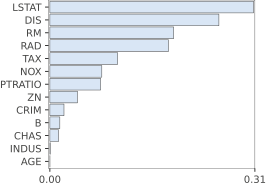

In [3]:
lm = LinearRegression()
lm.fit(X, y)

from rfpimp import *
I = importances(lm, X, y)
plot_importances(I)

**1. Split off validation/test set**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

**2. Pick most important single var**

In [5]:
X_train = X_train[['LSTAT']] # pick single feature for 1-var regression
X_test = X_test[['LSTAT']]

**3. Train LinearRegression model on (X_train, y_train); use variable lm**

In [6]:
lm = ...

<details>
<summary>Solution</summary>
<pre>
lm = LinearRegression()
lm.fit(X_train, y_train)
</pre>
</details>

Being able to visualize data sets is important in machine learning. Let's display the training and test sets using a scatterplot:

Text(0, 0.5, 'y')

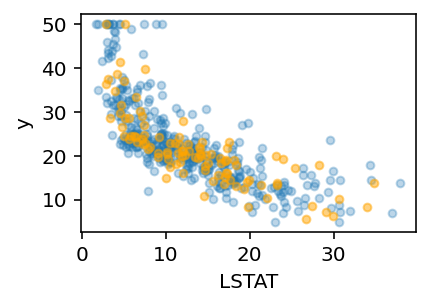

In [7]:
plt.figure(figsize=(3,2))
plt.scatter(X_train, y_train, s=15, alpha=.3)
plt.scatter(X_test, y_test, s=15, alpha=.5, c='orange')
plt.xlabel('LSTAT')
plt.ylabel('y')

**4. Create function plotting line for $(\beta_0,\beta_1)$ and extract betas from model**

In [8]:
def line(beta, x):
    return ...

<details>
<summary>Solution</summary>
<pre>
def line(beta, x):
    return beta[0] + beta[1]*x
</pre>
</details>

In [9]:
beta = np.array([...])

<details>
<summary>Solution</summary>
<pre>
beta = np.array([lm.intercept_, lm.coef_[0]])
</pre>
</details>

**5. Plot regression line using coefficients in beta**

It should look like:

<img src="boston-linreg.png" width="200">

In [ ]:
plt.figure(figsize=(3,2))
plt.scatter(X_train, y_train, s=15, alpha=.3)
plt.scatter(X_test, y_test, s=15, alpha=.5, c='orange')
plt.xlabel('LSTAT')
plt.ylabel('y')

lx = np.arange(np.min(X_train['LSTAT']), np.max(X_train['LSTAT'])).reshape(-1,1)
y_pred = ...
plt.plot(lx, y_pred, '--',color='red', linewidth=1)

<details>
<summary>Solution</summary>
<pre>
y_pred = line(beta,lx)
</pre>
</details>

**6. Verify that the model predictions give the same line**

In [ ]:
plt.figure(figsize=(3,2))
plt.scatter(X_train, y_train, s=15, alpha=.3)
plt.scatter(X_test, y_test, s=15, alpha=.5, c='orange')
plt.xlabel('LSTAT')
plt.ylabel('y')

y_pred = ...
plt.plot(lx, y_pred, '--',color='red', linewidth=1)

<details>
<summary>Solution</summary>
<pre>
y_pred = lm.predict(lx)
</pre>
</details>

**7. How good is that fit? Compare your belief with $R^2$ computed on the test set**

In [ ]:
r2 = lm.score(...)
print(f"R^2 = {r2:.3f}")

<details>
<summary>Solution</summary>
<pre>
r2 = lm.score(X_test, y_test)
</pre>
</details>

**8. Compare the $R^2$ computed on the test set and training set**

It should be about the same because there is a clear linear relationship to exploit and the training and test sets look similar.

In [ ]:
r2_train = lm.score(...)
print(f"R^2 = {r2_train:.3f}")

<details>
<summary>Solution</summary>
<pre>
r2_train = lm.score(X_train, y_train)
</pre>
</details>

## Wine data set 2-class logistic regression

The wine data set has three categories or classes of wine, but we can strip out one of the categories to get a two class problem for simple logistic regression. (We'll drop class 0, but then rename classes 1,2 as 0,1.)

In [11]:
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['y'] = wine.target
df_wine = df_wine[df_wine['y']>=1] # Only do 2-class problem, classes {1,2}
df_wine['y'] -= 1                  # rename classes as {0,1}
X = df_wine['color_intensity']
y = df_wine['y']

In [12]:
def plot12(X,y):
    X_0 = X[y==0] # separate class 0, 1 to color differently
    X_1 = X[y==1]

    plt.figure(figsize=(4.8,1.5))
    plt.scatter(X_0, [0]*len(X_0), s=20, alpha=.8, label='class1')
    plt.scatter(X_1, [1]*len(X_1), s=20, alpha=.8, label='class2')
    plt.xlabel('color_intensity')
    plt.ylabel('class')
    plt.legend(loc='upper left', fontsize=9)
    plt.title("1D wine data set, classes 1,2", fontsize=10)

**1. Split off validation/test set**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

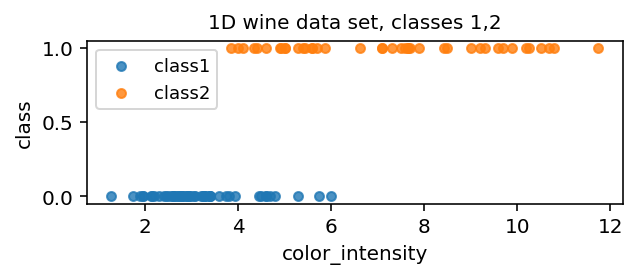

In [14]:
plot12(X_train, y_train)

**2. Train and test logistic regression model**

Note that `fit()` requires a matrix so you cannot pass in a one-dimensional numpy array. Use `X.values.reshape(-1,1)` to convert a vector `X` into an nx1 matrix. Also, be aware that `LogisticRegression` does regularized logistic regression by default so your model will performing better than vanilla logistic regression would do.

In [ ]:
lg = ...  # (Use arg solver='lbfgs' to get rid of a warning)
lg.fit(...)

<details>
<summary>Solution</summary>
<pre>
lg = LogisticRegression(solver='lbfgs')
lg.fit(X_train.values.reshape(-1,1), y_train)
</pre>
</details>

Check accuracy:

In [ ]:
print(f"{100*lg.score(X_train.values.reshape(-1,1), y_train):.2f}% accurate on training set")
print(f"{100*lg.score(X_test.values.reshape(-1,1), y_test):.2f}% accurate on test set")

**3. Create sigmoid function and extract betas from the model**

In [ ]:
def sigmoid(z):
    return ...

In [ ]:
beta = np.array([...])

<details>
<summary>Solution</summary>
<pre>
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
beta = np.array([lg.intercept_, lg.coef_[0][0])
</pre>
</details>

**4. Plot regression line using coefficients from model**

You'll have to create the predictions manually. Recall that logistic regression predicts the probability of class 1 given a feature vector. That probability is just the sigmoid of the linear equation.  It should look like:

<img src="wine-logreg.png" width="400">

In [ ]:
plot12(X,y)

lx = np.arange(np.min(X_train), np.max(X_train)).reshape(-1,1)
y_pred = ...
plt.plot(lx, y_pred, '--', c='red', lw=1)

<details>
<summary>Solution</summary>
<pre>
y_pred = sigmoid(line(beta, lx))
</pre>
</details>

**5. Verify that the model predictions give the same line**

Here we don't want classification; we want the probabilities so use function `predict_proba()` not `predict()`.

In [ ]:
plot12(X,y)
y_pred = ...
plt.plot(lx, y_pred, '--', c='red', lw=1)

<details>
<summary>Solution</summary>
<pre>
y_pred = lg.predict_proba(lx)[:,1]
</pre>
</details>